In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
wikidata_rdfmt = json.load(open('../data/wikidata-rdfmt.json'))['wikidata']
dbpedia_rdfmt = json.load(open('../data/dbpedia-rdfmt.json'))['dbpedia']
yago_rdfmt = json.load(open('../data/yago-rdfmt.json'))['yago']
linkedmdb_rdfmt = json.load(open('../data/linkedmdb-rdfmt.json'))['linkedmdb']
musicbrainz_rdfmt = json.load(open('../data/musicbrainz-rdfmt.json'))['musicbrainz']

In [3]:
# Subject Labelin

In [6]:
wd_subject_labeling = {}
for cl, data in wikidata_rdfmt.iteritems():
    if 'subject_labeling' not in data or 'http' not in data:
        continue
    wd_subject_labeling[cl] = data['subject_labeling']
    
dbpedia_subject_labeling = {}
for cl, data in dbpedia_rdfmt.iteritems():
    dbpedia_subject_labeling[cl] = data['subject_labeling']

yago_subject_labeling = {}
for cl, data in yago_rdfmt.iteritems():
    if not data['subject_labeling']:
        data['subject_labeling'] = 0
    yago_subject_labeling[cl] = data['subject_labeling']

linkedmdb_subject_labeling = {}
for cl, data in linkedmdb_rdfmt.iteritems():
    linkedmdb_subject_labeling[cl] = data['subject_labeling']

musicbrainz_subject_labeling = {}
for cl, data in musicbrainz_rdfmt.iteritems():
    musicbrainz_subject_labeling[cl] = data['subject_labeling']

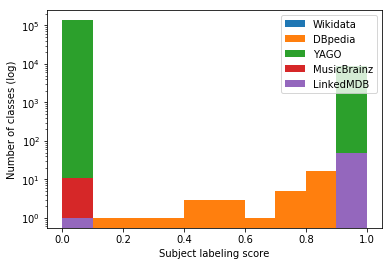

In [8]:
plt.hist(wd_subject_labeling.values(), label='Wikidata')
plt.hist(dbpedia_subject_labeling.values(), label='DBpedia')
plt.hist(yago_subject_labeling.values(), label='YAGO')
plt.hist(musicbrainz_subject_labeling.values(), label='MusicBrainz')
plt.hist(linkedmdb_subject_labeling.values(), label='LinkedMDB')

plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('Subject labeling score')
plt.ylabel('Number of classes (log)')
plt.show()

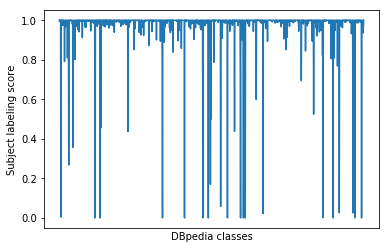

In [10]:
plt.plot(dbpedia_subject_labeling.values())

plt.xticks([])
plt.xlabel('DBpedia classes')
plt.ylabel('Subject labeling score')
plt.show()

In [14]:
# For each KG, the metrics

In [29]:
import numbers
data_wd = {}
for x in wikidata_rdfmt.values():
    for metric, data in x.iteritems():
        if not isinstance(data, numbers.Number) or not data <= 1:
            continue
        if metric in data_wd:
            data_wd[metric].append(data)
        else:
            data_wd[metric] = [data]

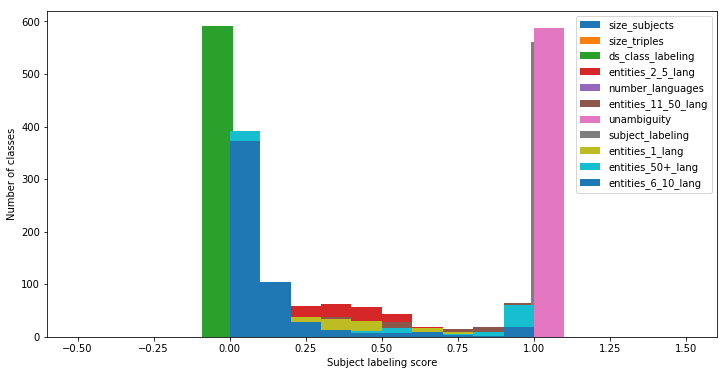

In [72]:
for key, value in data_wd.iteritems():
    plt.hist(value, label=key)
plt.rcParams["figure.figsize"] = [12,6]
plt.legend(loc='upper right')
plt.xlabel('Subject labeling score')
plt.ylabel('Number of classes')

plt.savefig('wikidata-all-metrics-classes.png')